In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils
from keras.datasets import mnist

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import os

In [2]:
# mnist data load
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
#2. train 데이터를 70%만 가져옵니다
sample_x = np.random.choice(6000,42000)
X_train = X_train[sample_x, :]
Y_train = Y_train[sample_x]

In [4]:
# 3.  데이터 전처리   
#     1) 다차원을 2차원으로 차원 변경
#    2) 값을 0 ~ 1 사이의 값으로 정규화
#    3) 원-핫 인코딩  ( Y의 값을  class라고 함) 
X_train = X_train.reshape(X_train.shape[0], 
                          X_train.shape[1]*X_train.shape[2]).astype(float)/255
X_test = X_test.reshape(X_test.shape[0], 
                        X_test.shape[1]*X_test.shape[2])/255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [5]:
# 4. 모델 설정 
model = Sequential()
model.add(Dense(512, input_dim=X_test.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [22]:
# 5. 모델 최적화
#    1) epoch실행할 때마다 모델 저장 
#       -> 디렉토리 생성후 저장 epoch횟수-에러값.hdf5 을 파일명으로
#    2) 더이상 값의 변화가 없을 때 모델 실행 중단 
#       -> 값의 변화가 없는 epoch의 수는 30
model_dir = "./CNN_model/"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
modelpath = model_dir + "{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath,
                              monitor='val_loss',
                              save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', 
                              patience=30)

In [23]:
# 6. 모델의 실행결과를 그래프로 표현하기 위해 변수에 저장
hist = model.fit(X_train, Y_train, 
                validation_data=(X_test, Y_test), epochs=200, verbose=0,
                callbacks=[early_stopping, checkpointer])

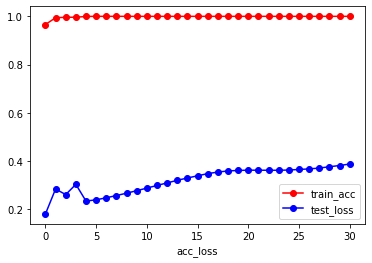

In [8]:
# 7. 저장된 변수의 학습셋의 정확도와 테스트셋의 오차를 화면에 표시
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_acc, marker='o', c='red', label='train_acc')
plt.plot(x_len, y_vloss, marker='o', c='blue', label='test_loss')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.xlabel('acc_loss')
plt.show()

In [37]:
from keras.models import load_model

def search(dir):
    return os.listdir(dir)

model_name = "./" + model_dir + os.listdir(model_dir)[-1]
model_l = load_model(model_name) 

model_l.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [39]:
os.listdir("./")

['.ipynb_checkpoints',
 '01_myfirst_deep.ipynb',
 '3d_graphic.py',
 'b1e547f9318cf310.ipynb',
 'CNN-basic.ipynb',
 'CNN.ipynb',
 'CNN_model',
 'CNN_test.ipynb',
 'dataset',
 'deep_lab01.ipynb',
 'iris_multi.ipynb',
 'keras-linear.ipynb',
 'keras_linear.ipynb',
 'linear.ipynb',
 'linear_1.ipynb',
 'linear_regression.ipynb',
 'logistics.ipynb',
 'model',
 'pima_indian.ipynb',
 'pima_model',
 'sona-k-fold.ipynb',
 'sona.ipynb',
 'sona_model.h5',
 'sona_test_train.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Untitled3.ipynb',
 'wine.hd5',
 'wine.ipynb',
 'XOR.ipynb',
 '빅데이터 인사이트 교재.pptx']